In [69]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [6]:
import os

In [52]:
data_file = "data/TADPOLE/ADNIMERGE.csv"
merge_data = pd.read_csv(data_file, na_values="")



In [104]:
merge_data

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,2005-09-08,CN,74.3,Male,...,NaN,NaN,1.36665,NaN,NaN,0.000000,0.00000,0,0,2019-02-14 23:58:27.0
1,3,011_S_0003,bl,11,ADNI1,ADNI1,2005-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.000000,0.00000,0,0,2019-02-14 23:58:27.0
2,3,011_S_0003,m06,11,ADNI1,ADNI1,2006-03-13,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.498289,5.96721,6,6,2019-02-14 23:58:27.0
3,3,011_S_0003,m12,11,ADNI1,ADNI1,2006-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.999316,11.96720,12,12,2019-02-14 23:58:27.0
4,3,011_S_0003,m24,11,ADNI1,ADNI1,2007-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,1.998630,23.93440,24,24,2019-02-14 23:58:27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13910,4384,029_S_4384,m84,29,ADNI3,ADNI2,2019-04-09,CN,62.3,Male,...,109.3,9.86,1.12969,NaN,1.06225,7.167690,85.83610,84,84,2019-04-10 04:36:05.0
13911,6703,135_S_6703,bl,135,ADNI3,ADNI3,2019-04-09,NaN,62.7,Female,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000,0,0,2019-04-10 04:36:10.0
13912,6145,014_S_6145,m12,14,ADNI3,ADNI3,2019-04-09,CN,70.3,Female,...,NaN,NaN,NaN,NaN,NaN,1.073240,12.85250,12,12,2019-04-11 04:36:24.0
13913,6148,014_S_6148,m12,14,ADNI3,ADNI3,2019-04-05,SMC,81.5,Female,...,NaN,NaN,NaN,NaN,NaN,1.081450,12.95080,12,12,2019-04-11 04:36:24.0


In [105]:
print(merge_data.shape)

(13915, 113)


In [181]:
totno_subjects = merge_data["RID"].nunique()
totno_subjects

2155

In [107]:
#how many patients at each checkup
# merge_data.groupby("VISCODE")["RID"].nunique().sort_values()
# This returns a df whereas nunique returns a series
no_measurements_per_tp = merge_data.groupby(by='VISCODE', as_index=False).agg({'RID': pd.Series.nunique})


In [175]:
#Select the feature you want to plot and add it to the columns below
ptau = merge_data[["RID", "VISCODE", "PTAU", "FDG"]]
#Rename your column so the operations done below can be generalized
ptau.rename({"FDG" : "FEATURE"}, axis=1, inplace=True)
ptau = ptau.groupby(by='VISCODE', as_index=False).count()
ptau["VISCODE"] = ptau["VISCODE"].astype("string")
ptau["VISCODE"].dtype
ptau["VISCODE"] = ptau["VISCODE"].str[1:]
ptau["VISCODE"] = pd.to_numeric(ptau["VISCODE"], errors = 'coerce')
ptau = ptau.replace(np.nan, 0, regex=True)
ptau["VISCODE"] = ptau["VISCODE"].astype(int)
ptau = ptau.sort_values(by=["VISCODE"])
#ptau["PTAU"] = ptau["PTAU"] / totno_subjects
ptau["FEATURE"] = ptau["FEATURE"]/ totno_subjects
#plt.plot(ptau["VISCODE"], ptau["PTAU"])
ptau = ptau.head(10)
ptau

/home/moyde/Documents/Studies/Chalmers/Thesis/LIPTraAD/statistical_analysis_ADNI/venv/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,VISCODE,RID,PTAU,FEATURE
0,0,2155,1215,0.628770
1,3,793,0,0.000000
2,6,1618,2,0.170766
6,12,1563,320,0.156845
12,18,1292,1,0.071462
13,24,1327,443,0.306265
14,30,750,2,0.000000
15,36,854,81,0.088167
16,42,308,0,0.000000
17,48,716,182,0.058933


[(0.0, 1.0)]

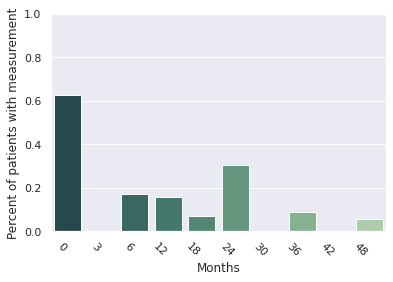

In [202]:
colors = sns.cubehelix_palette(n_colors = 10, start=2.8, rot=-.4, dark=0.25, light=.75, reverse=True)
ax = sns.barplot(x="VISCODE", y ="FEATURE", data = ptau,palette = colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, horizontalalignment='right')
ax.set(xlabel="Months", ylabel="Percent of patients with measurement")
ax.set(ylim=(0,1))

In [179]:

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("FDG_time_perc.png")